#  gradient descent
- it is an algorithm that finds the minimum value of a function by taking small steps in the opposite direction of the gradient.

In [1]:
from sklearn.datasets import make_regression

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
X,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20)

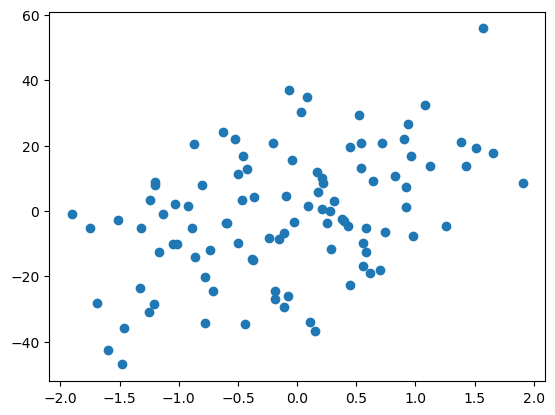

In [4]:
plt.scatter(X,y)

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
lr=LinearRegression()

In [7]:
lr.fit(X,y)
print(lr.coef_) #slope  denoted by m
print(lr.intercept_)  #it is b  (it is our actual b)

[9.84831748]
-0.27173071190874465


# now make class to apply gradiend descent
- take m as constant taking the above we get

In [9]:
class GDregressor:

    def __init__(self,learning_rate,epochs):
        self.m=9.84
        self.b=-120
        self.lr=learning_rate
        self.epochs=epochs

    def fit(self,X,y):
        # calculating b using GD
        for i in range(self.epochs):
            loss_slope= -2*np.sum(y-self.m*X.ravel() - self.b)
            self.b = self.b - (self.lr * loss_slope)
        print(self.b)


In [20]:
gd=GDregressor(0.001,90)

In [21]:
gd.fit(X,y)  # almost equals to actual

-0.27250003298476677
